In [1]:
from astropy.io import fits
import astropy
import numpy as np
import matplotlib.pyplot as plt
import salat_read as sr
import salat_read_header as srhdr
import astropy.units as u
from datetime import datetime,timedelta
from scipy import stats

In [2]:
file = "solaralma.b3.fba.20161222_141931-150707.2016.1.00423.S.level4.k.fits"

# READ FITS

In [3]:
#sqcubecrop,_,_,_,_,_,_ = sr.salat_read(file,SILENT=True)

In [4]:
almacube,_,timesec,timeutc,beammajor,beamminor,beamangle = sr.salat_read(file,timeout=True,beamout=True)

 23%|██▎       | 277/1200 [00:00<00:00, 2764.00it/s]


----------------------------------------------
SALAT READ part of -- Solar Alma Library of Auxiliary Tools (SALAT) --

Reading ALMA cube



100%|██████████| 1200/1200 [00:00<00:00, 3051.53it/s]



----------------------------------------------
SALAT READ HEADER part of -- Solar Alma Library of Auxiliary Tools (SALAT) --

Reading Times

Reading Beam properties


----------------------------------------------
|  About this dataset: 
----------------------------------------------
|  ALMA BAND:  3
|  Obs. Date:  2016-12-22
|  Pix. Unit:  K
|  Pix. Size:  0.320000  arcsec.
|  Nr. frames:  1200
|  Width frame:  213  pix.
|  Height frame:  213  pix.
----------------------------------------------

Done!


# READ HEADER

In [83]:
hdr0,hdr1,hdr2 = srhdr.salat_read_header(file,SILENT=True)


----------------------------------------------
SALAT READ HEADER part of -- Solar Alma Library of Auxiliary Tools (SALAT) --



In [84]:
hdr0

SIMPLE  =                    T /   Written by IDL:  Fri Jul 16 12:51:53 2021    
BITPIX  =                  -32 /  IEEE double precision floating point          
NAXIS   =                    5 /                                                
NAXIS1  =                  320 / Number of positions along axis 1               
NAXIS2  =                  320 / Number of positions along axis 2               
NAXIS3  =                    1 / Number of positions along axis 3               
NAXIS4  =                    1 / Number of positions along axis 4               
NAXIS5  =                 1200 / Number of positions along axis 5               
EXTEND  =                    T /                                                
BSCALE  =   1.000000000000E+00 /PHYSICAL = PIXEL*BSCALE + BZERO                 
BZERO   =   0.000000000000E+00                                                  
BMAJ    = '0.000583749'        /Mean of bmin and bmax                           
BMIN    = '0.000379633'     

# STATS

In [9]:
import salat_stats as sst


----------------------------------------------
SALAT STATS part of -- Solar Alma Library of Auxiliary Tools (SALAT) --

Computing Statistics

----------------------------------------------

----------------------------------------------
|  Statistics: 
----------------------------------------------
|  Array size: t = 1200 x = 213  y = 213
|  Min =  4573.0864
|  Max =  10635.463
|  Mean =  7387.6777
|  Median =  7327.3237
|  Mode =  7305.5439453125
|  Standard deviation =  518.9196
|  Variance =  269277.6
|  Skew =  0.5515595599860053
|  Kurtosis =  0.7880534357145392
|  Percentile 1 =  [6318.5185498  8812.49609375]
|  Percentile 5 =  [6645.40478516 8361.46972656]
----------------------------------------------



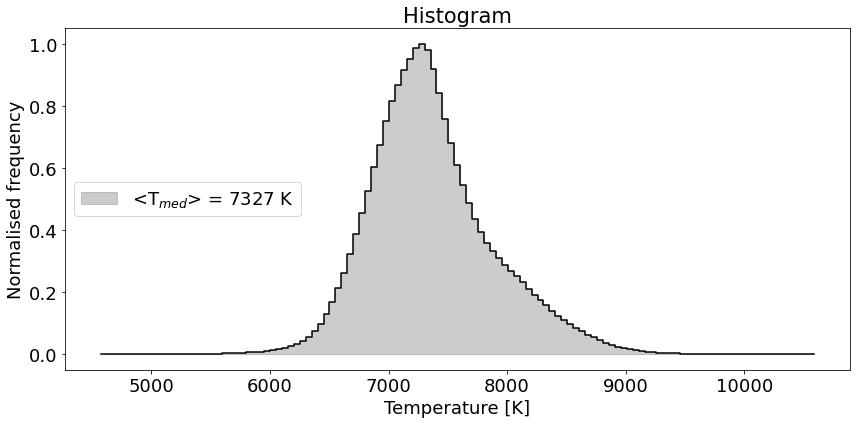

In [11]:
datastats = sst.salat_stats(almacube,Histogram=True,)

In [10]:
datastatsfr = sst.salat_stats(almacube[600],Histogram=False,)


----------------------------------------------
SALAT STATS part of -- Solar Alma Library of Auxiliary Tools (SALAT) --

Computing Statistics

----------------------------------------------

----------------------------------------------
|  Statistics: 
----------------------------------------------
|  Array size:  x = 213  y = 213
|  Min =  5612.39
|  Max =  9410.704
|  Mean =  7369.833
|  Median =  7321.307
|  Mode =  6524.15234375
|  Standard deviation =  504.72388
|  Variance =  254746.2
|  Skew =  0.4498990813400296
|  Kurtosis =  0.43566104487123214
|  Percentile 1 =  [6326.81664063 8707.12626953]
|  Percentile 5 =  [6594.69108887 8287.37587891]
----------------------------------------------



# BEAM STATS

In [4]:
import salat_beam_stats as sbs


----------------------------------------------
SALAT BEAM STATS part of -- Solar Alma Library of Auxiliary Tools (SALAT) --

Computing Statistics

----------------------------------------------

----------------------------------------------
|  Statistics: 
----------------------------------------------
|  Min (major,minor,angle,area) =  (2.0301436772570014, 1.3583892490714788, 67.04122, 2.1699882237884673)
|  Max (major,minor,angle,area) =  (2.1893782541155815, 1.3740585884079337, 68.90729, 2.3556596243785903)
|  Mean (major,minor,angle,area) =  (2.101498652540613, 1.3666819556965493, 68.04936, 2.2558125338146087)
|  Median (major,minor,angle,area) =  (2.097920689266175, 1.367768389172852, 68.129944, 2.252857507134082)
|  Standard deviation (major,minor,angle,area) =  (0.046229713450479264, 0.004009421305141309, 0.5219541, 0.05374611320453778)
----------------------------------------------



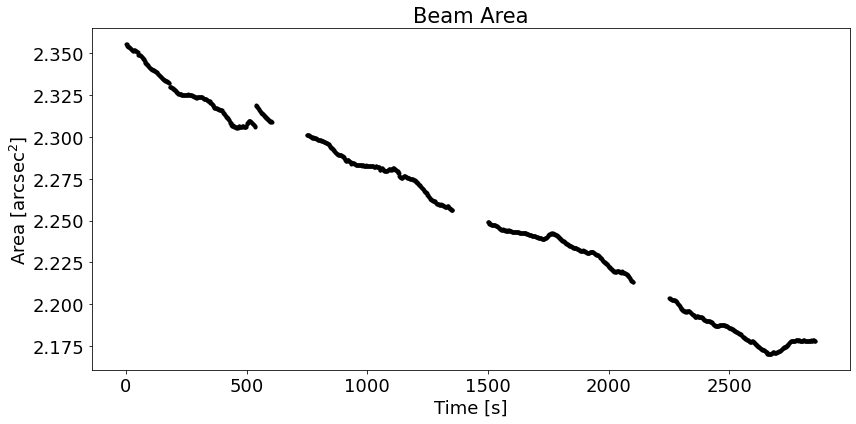

In [7]:
sbs.salat_beam_stats(beammajor,beamminor,beamangle,timesec,plot=True)

# PLOT MAP

In [5]:
import salat_plot_map as spm

In [6]:
beam = [beammajor,beamminor,beamangle]
pxsize = 0.32


----------------------------------------------
SALAT PLOT MAP part of -- Solar Alma Library of Auxiliary Tools (SALAT) --

----------------------------------------------


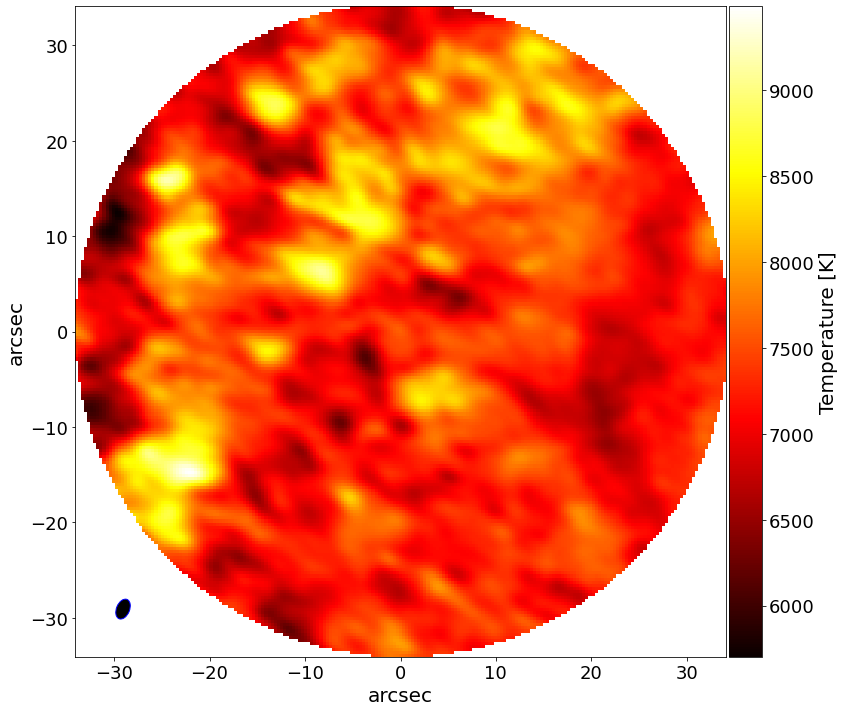

In [7]:
spm.salat_plot_map(almacube,beam,pxsize,cmap='hot',average=False,timestp=0,savepng=False,savejpg=False,outputpath="./")


----------------------------------------------
SALAT PLOT MAP part of -- Solar Alma Library of Auxiliary Tools (SALAT) --

----------------------------------------------


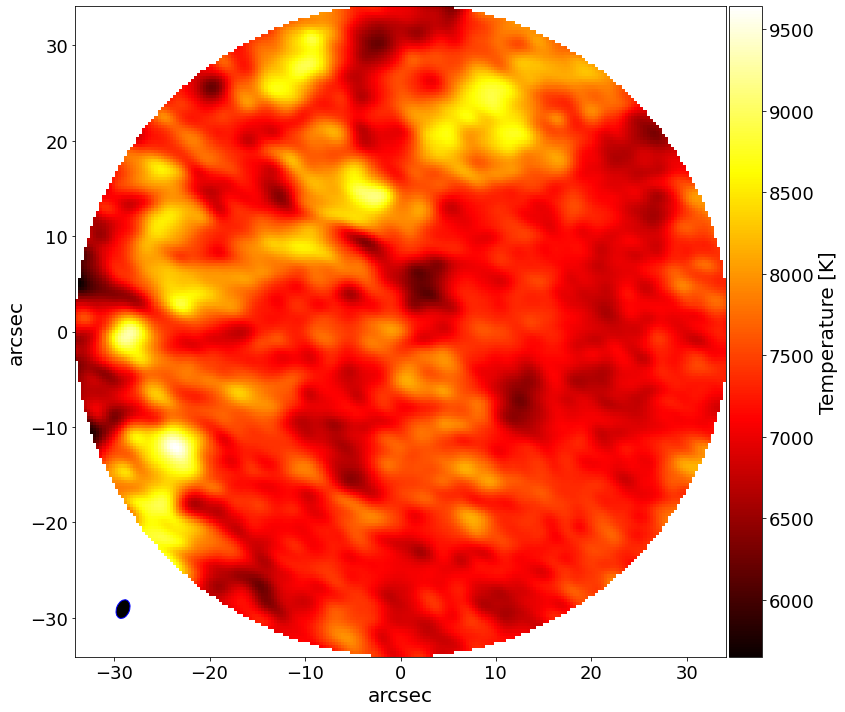

In [9]:
spm.salat_plot_map(almacube,beam,pxsize,cmap='hot',average=False,timestp=1110,savepng=False,savejpg=False,outputpath="./")

# TIMELINE

In [7]:
import salat_timeline as stl


----------------------------------------------
SALAT TIME LINE part of -- Solar Alma Library of Auxiliary Tools (SALAT) --

----------------------------------------------


({'Sc. 1': [0, 299],
  'Sc. 2': [300, 599],
  'Sc. 3': [600, 899],
  'Sc. 4': [900, 1199]},
 {'Sec. 1': [0, 149],
  'Sec. 2': [150, 299],
  'Sec. 3': [300, 449],
  'Sec. 4': [450, 599],
  'Sec. 5': [600, 749],
  'Sec. 6': [750, 899],
  'Sec. 7': [900, 1049],
  'Sec. 8': [1050, 1199]})

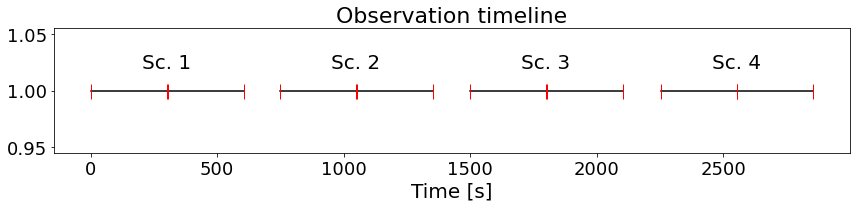

In [8]:
stl.salat_timeline(timesec,gap=30)

# SALAT INFO

In [5]:
import salat_info as sin


In [6]:
sin.salat_info(file)


----------------------------------------------
SALAT INFO part of -- Solar Alma Library of Auxiliary Tools (SALAT) --

----------------------------------------------

----------------------------------------------
SALAT READ HEADER part of -- Solar Alma Library of Auxiliary Tools (SALAT) --


----------------------------------------------
| Data feat.: 
----------------------------------------------
|  ALMA BAND:  3
|  Obs. Date:  2016-12-22
|  ALMA proj:  2016.1.00423.S
|  Pix. Unit:  K
|  Pix. Size:  0.320000  arcsec.
|  Beam mean:  1.7340876  arcsec
|  FOV. diam:  notcomputed
----------------------------------------------
| Data range 
----------------------------------------------
|  Min =  4573.09  Kelvin
|  Max =  10635.5  Kelvin
----------------------------------------------

